In [2]:
import QuantLib as ql
from datetime import datetime, date, timedelta
import pandas as pd
date_today = datetime(2022,12,30)
# Set the date today
ql_date_today = ql.Date(date_today.strftime("%Y-%m-%d"), "%Y-%m-%d") #
ql.Settings.instance().evaluationDate = ql_date_today 
helpers = []
depositRates = [0.02416, 0.02701]
depositMaturities = ['1D', '3M']
calendar = ql.Sweden()
fixingDays = 2
endOfMonth = False 
convention = ql.ModifiedFollowing
dayCounter = ql.Actual360()
for r,m in zip(depositRates, depositMaturities):
    if m == '1D':
        fixingDays = 1 
        convention = ql.Following
    elif m == '3M':
        convention = ql.Following
        fixingDays = 2
    helpers.append(ql.DepositRateHelper(ql.QuoteHandle(ql.SimpleQuote(r)),
                    ql.Period(m), 
                    fixingDays,
                    calendar, 
                    convention,
                    endOfMonth,
                    dayCounter))
curve1 = ql.PiecewiseLinearZero(0, ql.TARGET(), helpers, ql.Actual365Fixed())
curve1.enableExtrapolation()

def ql_to_datetime(d):
    return datetime(d.year(), d.month(), d.dayOfMonth())
def calc_days(maturity, date_now = date_today):
    return  (maturity-date_now).days
dates, rates = zip(*curve1.nodes())
dates = list(map(ql_to_datetime, dates))
days = list(map(calc_days, dates))
df = pd.DataFrame(dict({"Date": dates, "Rate": rates, "Days" : days}))
df

,Date,Rate,Days
0,2022-12-30,0.024495,0
1,2023-01-03,0.024495,4
2,2023-04-03,0.027174,94


In [3]:
rates

(0.024494733630382338, 0.024494733630382338, 0.027174014775094034)

In [12]:
print(df.to_markdown())


|    | Date                |      Rate |   Days |
|---:|:--------------------|----------:|-------:|
|  0 | 2022-12-30 00:00:00 | 0.0244947 |      0 |
|  1 | 2023-01-03 00:00:00 | 0.0244947 |      4 |
|  2 | 2023-04-03 00:00:00 | 0.027174  |     94 |


In [2]:
import QuantLib as ql
from datetime import datetime, date, timedelta
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.style.use('default')
plt.style.use('seaborn-deep')
#date_today = datetime.today().strftime("%Y-%m-%d")
date_today = datetime(2022,12,30)
# Set the date today
ql_date_today = ql.Date(date_today.strftime("%Y-%m-%d"), "%Y-%m-%d") #
ql.Settings.instance().evaluationDate = ql_date_today 
helpers = []
depositRates = [0.02416*100, 0.02701*100]
depositMaturities = ['1D', '3M']
calendar = ql.Sweden()
fixingDays = 2
endOfMonth = False 
convention = ql.ModifiedFollowing
dayCounter = ql.Actual360()
for r,m in zip(depositRates, depositMaturities):
    if m == '1D':
        fixingDays = 1 
        convention = ql.Following
    elif m == '3M':
        convention = ql.Following
        fixingDays = 2
    else:
        fixingDays = 2 
        convention = ql.ModifiedFollowing
    helpers.append(ql.DepositRateHelper(ql.QuoteHandle(ql.SimpleQuote(r/100.0)),
                    ql.Period(m), 
                    fixingDays,
                    calendar, 
                    convention,
                    endOfMonth,
                    dayCounter))
curve1 = ql.PiecewiseLinearZero(0, ql.TARGET(), helpers, ql.Actual365Fixed())
curve1.enableExtrapolation()
def ql_to_datetime(d):
    return datetime(d.year(), d.month(), d.dayOfMonth())
def calc_days(maturity, date_now = date_today):
    return  (maturity-date_now).days
dates, rates = zip(*curve1.nodes())
dates = list(map(ql_to_datetime, dates))
days = list(map(calc_days, dates))
df = pd.DataFrame(dict({"Date": dates, "Rate": rates, "Days" : days}))

df.to_clipboard()
df

,Date,Rate,Days
0,2022-12-30,0.024495,0
1,2023-01-03,0.024495,4
2,2023-04-03,0.027174,94


In [34]:

import QuantLib as ql
from datetime import datetime, date, timedelta
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.style.use('default')
plt.style.use('seaborn-deep')
#date_today = datetime.today().strftime("%Y-%m-%d")
date_today = datetime(2022,12,30)
# Set the date today
ql_date_today = ql.Date(date_today.strftime("%Y-%m-%d"), "%Y-%m-%d") #
ql.Settings.instance().evaluationDate = ql_date_today 
helpers = []
depositRates = [0.02416*100, 0.02701*100]
depositMaturities = ['1D', '3M']
calendar = ql.Sweden()
fixingDays = 2
endOfMonth = False
convention = ql.ModifiedFollowing
dayCounter = ql.Actual360()
for r,m in zip(depositRates, depositMaturities):

    if m == '3M':
        convention = ql.Following
        fixingDays = 2

        helpers.append(ql.DepositRateHelper(ql.QuoteHandle(ql.SimpleQuote(r/100.0)),
                        ql.Period(m), 
                        fixingDays,
                        calendar, 
                        convention,
                        endOfMonth,
                        dayCounter))
curve1 = ql.PiecewiseLinearZero(0, ql.TARGET(), helpers, ql.Actual365Fixed())
curve1.enableExtrapolation()
def ql_to_datetime(d):
    return datetime(d.year(), d.month(), d.dayOfMonth())
def calc_days(maturity, date_now = date_today):
    return  (maturity-date_now).days
dates, rates = zip(*curve1.nodes())
dates = list(map(ql_to_datetime, dates))
days = list(map(calc_days, dates))
df = pd.DataFrame(dict({"Date": dates, "Rate": rates, "Days" : days}))

df.to_clipboard()
df

,Date,Rate,Days
0,2022-12-30,0.027293,0
1,2023-04-03,0.027293,94


In [28]:
from datetime import date
from dateutil.relativedelta import relativedelta

print((date(2022,12,30) - date(2023,3,30)).days)

-90


In [24]:
datetime(2022,3,12).

datetime.datetime(2022, 3, 12, 0, 0)

In [38]:
import QuantLib as ql
from datetime import datetime, date, timedelta
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.style.use('default')
plt.style.use('seaborn-deep')
#date_today = datetime.today().strftime("%Y-%m-%d")
date_today = datetime(2022,12,30)
# Set the date today
ql_date_today = ql.Date(date_today.strftime("%Y-%m-%d"), "%Y-%m-%d") #
ql.Settings.instance().evaluationDate = ql_date_today 
helpers = []
depositRates = [0.02416*100, 0.02701*100]
depositMaturities = ['1D', '3M']
calendar = ql.Sweden()
fixingDays = 2
endOfMonth = False
convention = ql.ModifiedFollowing
dayCounter = ql.Actual360()
for r,m in zip(depositRates, depositMaturities):
    if m == '1D':
        fixingDays = 1 
        convention = ql.Following
    elif m == '3M':
        convention = ql.Following
        fixingDays = 2
    else:
        fixingDays = 2 
        convention = ql.ModifiedFollowing
    helpers.append(ql.DepositRateHelper(ql.QuoteHandle(ql.SimpleQuote(r/100.0)),
                    ql.Period(m), 
                    fixingDays,
                    calendar, 
                    convention,
                    endOfMonth,
                    dayCounter))
    
calendar = ql.TARGET()
index = ql.IborIndex('MyIndex', ql.Period('3M'), 2, ql.SEKCurrency(), calendar, ql.Following, True  , ql.Actual360())
rate = 0.0335
immOffsetStart = 1
immOffsetEnd = 2 
h = ql.FraRateHelper(rate, immOffsetStart, immOffsetEnd, index)
helpers.append(h)
fra = ['SEKFRAJUN23', 'SEKFRASEP23', 'SEKFRADEC23','SEKFRAMAR24',
       'SEKFRAJUN24', 'SEKFRASEP24', 'SEKFRADEC24','SEKFRAMAR25',
       'SEKFRAJUN25', 'SEKFRASEP25']
fraRates = [0.03645*100, 0.037*100, 0.0355*100, 0.0355*100,
            0.0346*100, 0.03355*100, 0.0319*100, 0.0317*100, 
            0.031*100, 0.03065*100, 0.03005*100]
fraStartEnd = [[2,5], [3,6], [4,7], [5,8],
               [6,9], [7,10], [8,11], [9,12],
               [10,13], [11,14], [12,15]]
fixingDays = 2
convention = ql.ModifiedFollowing
dayCounter = ql.Actual360()

for r,m in zip(fraRates, fraStartEnd):
    immOffsetStart = m[0]
    immOffsetEnd = m[1]
    helpers.append(ql.FraRateHelper(ql.QuoteHandle(ql.SimpleQuote(r/100.0)),
        immOffsetStart,     
        immOffsetEnd, 
        index))

def ql_to_datetime(d):
    return datetime(d.year(), d.month(), d.dayOfMonth())
def calc_days(maturity, date_now = date_today):
    return  (maturity-date_now).days
rate = ql.QuoteHandle(ql.SimpleQuote(0.0333))
tenor = ql.Period('4Y')
fixedFrequency = ql.Annual
fixedConvention = ql.ModifiedFollowing
fixedDayCount = ql.Thirty360(ql.Thirty360.BondBasis)
iborIndex = index
tenor =['4Y', '5Y', '6Y', '7Y', 
        '8Y', '9Y', '10Y', '12Y', 
        '15Y', '20Y', '25Y','30Y']
quotes = [3.33, 3.2775, 3.235, 3.205,
          3.1775, 3.1525, 3.1325, 3.095,
          3.0275, 2.92, 2.815, 2.6925]
for r,m in zip(quotes, tenor):
    rate = ql.QuoteHandle(ql.SimpleQuote(r/100.0))
    tenor = ql.Period(m)
    temp_helper = ql.SwapRateHelper(rate, tenor, calendar, fixedFrequency, fixedConvention, fixedDayCount, iborIndex)
    helpers.append(temp_helper)
curve1 = ql.PiecewiseLinearZero(0, ql.TARGET(), helpers, ql.Actual365Fixed())
curve1.enableExtrapolation()

dates, rates = zip(*curve1.nodes())
dates = list(map(ql_to_datetime, dates))
days = list(map(calc_days, dates))
actual_days = [0,4,94, 167, 265, 355,446,
               538, 629, 719, 809, 902, 993,
               1083, 1173, 1466, 1830, 2196, 2561,
               2926, 3293, 3657, 4387, 5484, 7311,
               9135, 10962]
df = pd.DataFrame(dict({"Date": dates, "Rate": rates, "Days" : days,"Actual Days": actual_days}))
df["Diff days"] = -df["Days"]  + df["Actual Days"]

In [39]:
with pd.option_context('display.float_format', '{:,.8f}'.format):
    display(df)

,Date,Rate,Days,Actual Days,Diff days
0,2022-12-30,0.02449473,0,0,0
1,2023-01-03,0.02449473,4,4,0
2,2023-04-03,0.02717401,94,94,0
3,2023-06-15,0.03058164,167,167,0
4,2023-09-21,0.03282499,265,265,0
5,2023-12-20,0.03396522,355,355,0
6,2024-03-20,0.03434622,446,446,0
7,2024-06-20,0.03460008,538,538,0
8,2024-09-19,0.03464545,629,629,0
9,2024-12-18,0.03454719,719,719,0


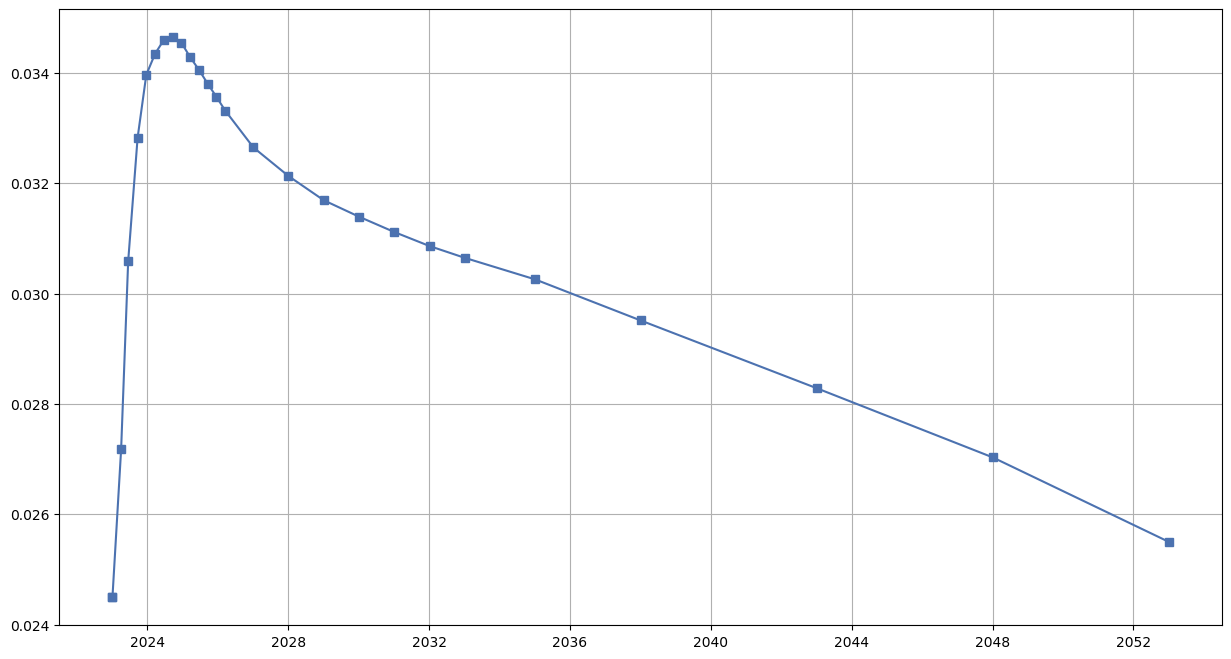

In [41]:
fig, ax = plt.subplots(figsize = (15,8))
ax.plot(dates, rates, '-s')
ax.grid("True")

In [42]:
linear_days = [1,2,3,7,30, 90, 180, 270, 365, 730, 1095, 1460, 1825, 2555, 3285, 3650, 5475, 7300, 10950]
linear = np.interp(linear_days, days, rates)

In [43]:
pd.DataFrame(linear).to_clipboard()

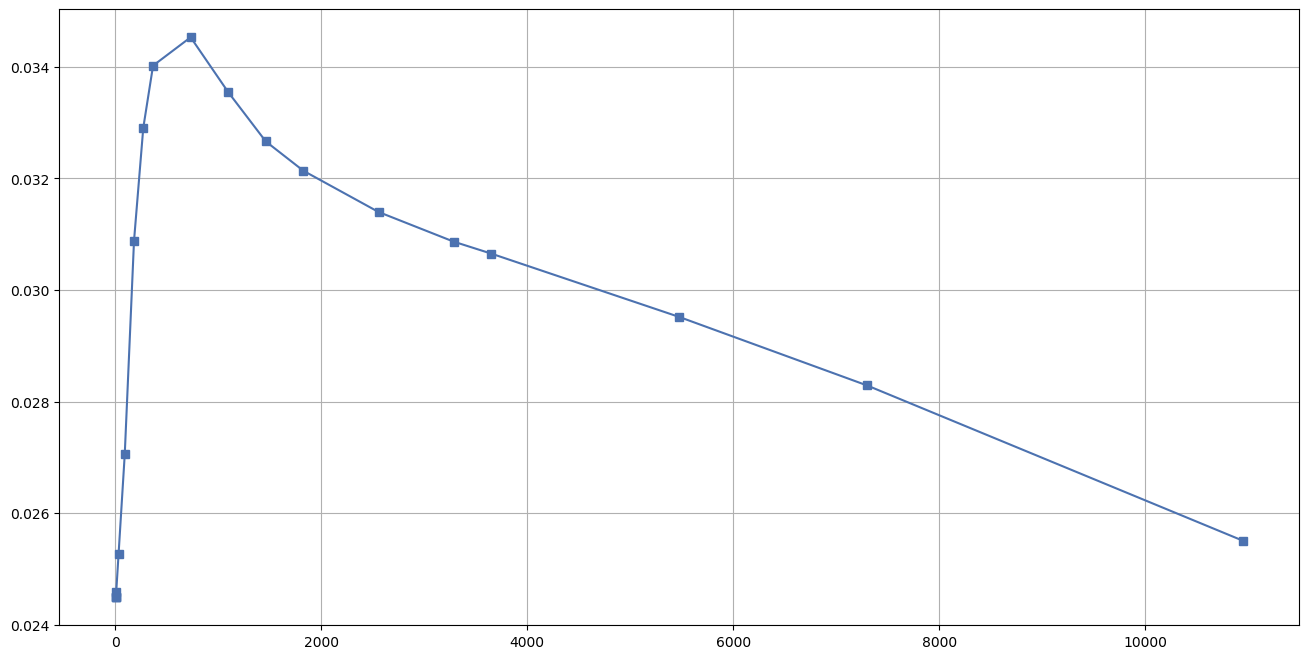

In [27]:
fig, ax = plt.subplots(figsize = (16,8))
ax.plot(linear_days, linear, '-s')
ax.grid("True")